# Lending Club Case Study   by Anandhakumar Dharmalingam

### Problem Statement:

Using the concepts of EDA to decipher which types of customers default on a loan

•	Need to understand how consumer attributes and loan attributes influence the tendency of default.



#### Meta Data Description:

This loan.csv data set is all about the loan approval process and the borrowers repayment follow up is observed.


#### Finding the consumer attributes & loan attributes in the LOAN data set:
consumer attributes :

id, member id, grade, sub_grade, emp_title, emp_length, home_ownership,  annul_inc, desc, purpose, title, zip_code, addr_state, 
loan attributes 
loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, verification_status, Issue_d, loan_status, pym, dti, delinq_2ys, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d
Classifying the required variable of Loan Dataset for our analysis:
1.	Categorical Variable:

i)	Ordered

Term, int_rate, grade, sub_grade, emp_length, verification_status, issue_d, loan_status, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, revol_util, pub_rec, last_pymnt_d, next_pymnt_d, last_credit_pull_d

ii)	Unordered

Emp_title, home_ownership, desc, purpose, title, zip_code, addr_state,


2.	Quantitative/Numeric variable: 

loan_amnt, funded_amnt, funded_amnt_inv, instalment, annual_inc, dti, open_acc, revol_bal, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt

## Data Cleaning

### Removing the Columns which are all having full of Missing Values

In [138]:
import pandas as pd
import numpy as np
print('numpy version:',np.__version__)
import pandas as pd
print('pandas version:',pd.__version__)
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)
lds=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv',low_memory=False)
lds=lds.dropna(axis=1,how="all")
print("Columns after removing the missing values")
print(lds.info())

numpy version: 1.20.1
pandas version: 1.2.2
Columns after removing the missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  ho

#### The columns which are not usefull for finding the defaulter are removed:

In [139]:
NotUsefulColumn = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url", "desc", "title", "zip_code", "delinq_2yrs", "mths_since_last_delinq", "mths_since_last_record", "revol_bal", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens", "application_type", "pub_rec_bankruptcies", "addr_state"]
lds.drop(NotUsefulColumn, axis=1, inplace=True)
print("final remaining columns are",list(lds.columns))

final remaining columns are ['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc']


#### emp_length and revol_util having null and NA rows are removed

In [140]:
lds.dropna(axis=0, subset=["emp_length","revol_util"], inplace=True)

## Standardise values

#### Standardise values by removing the percentage and text feature to numeric type for int_rate, revol_util and term columns

In [141]:
lds["int_rate"]=pd.to_numeric(lds["int_rate"].apply(lambda p:p.split('%') [0]))
lds["revol_util"]=pd.to_numeric(lds["revol_util"].apply(lambda p:p.split('%') [0]))

In [142]:
lds["term"]=pd.to_numeric(lds["term"].apply(lambda p:p.split()[0]))

##### Removing the value current because of irrelavent to the problem statement and changing the value fully paid to 0 and charged off to 1 of loan_status column

In [143]:
lds=lds[lds["loan_status"].apply(lambda p:False if p=="Current" else True)]
lds["loan_status"]=lds["loan_status"].apply(lambda p:0 if p=="Fully Paid" else 1)

#####  Standerdising emp_length by changing <1 year as 0 and 10+ as 10

In [144]:
lds["emp_length"]=pd.to_numeric(lds["emp_length"].apply(lambda p:0 if "<" in p else(p.split('+')[0] if "+" in p else p.split()[0])))

##### remove the row which is have in < 1% counts in purpose

In [145]:
lds_purpose=lds["purpose"].value_counts()*100/lds.shape[0]

In [146]:
lds_purpose_del=lds_purpose[lds_purpose<1].index.values
lds=lds[[False if n in lds_purpose_del else True for n in lds["purpose"]]]

## Removing Outlier which deviate the accuracy by comparing the 75% quantile and Max values 

In [147]:
lds["annual_inc"].describe()

count     36388.00
mean      69540.19
std       64953.76
min        4080.00
25%       41496.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [148]:
annual_inc_99 = lds["annual_inc"].quantile(0.99)
lds = lds[lds["annual_inc"] < annual_inc_99]

In [149]:
lds["open_acc"].describe()

count   36024.00
mean        9.31
std         4.38
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        44.00
Name: open_acc, dtype: float64

In [150]:
open_acc_999 = lds["open_acc"].quantile(0.999)
lds = lds[lds["open_acc"] < open_acc_999]

In [151]:
lds["total_acc"].describe()

count   35983.00
mean       22.03
std        11.30
min         2.00
25%        14.00
50%        20.00
75%        29.00
max        90.00
Name: total_acc, dtype: float64

In [152]:
total_acc_98 = lds["total_acc"].quantile(0.98)
lds = lds[lds["total_acc"] < total_acc_98]

In [153]:
lds["pub_rec"].describe()

count   35205.00
mean        0.05
std         0.24
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: pub_rec, dtype: float64

In [154]:
pub_rec_995 = lds["pub_rec"].quantile(0.995)
lds = lds[lds["pub_rec"] <= pub_rec_995]

## Now the final data for the analysis after Data Cleaning and standardizing the columns:

In [155]:
lds

loan_amnt  funded_amnt_inv  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status issue_d  loan_status             purpose   dti earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc
0           5000          4975.00    36     10.65       162.87     B        B2          10           RENT    24000.00            Verified  Dec-11            0         credit_card 27.65           Jan-85               1         3        0       83.70          9
1           2500          2500.00    60     15.27        59.83     C        C4           0           RENT    30000.00     Source Verified  Dec-11            1                 car  1.00           Apr-99               5         3        0        9.40          4
2           2400          2400.00    36     15.96        84.33     C        C5          10           RENT    12252.00        Not Verified  Dec-11            0      small_business  8.72           Nov-01               2         2        0       98.50         10
3          10000         10000.00    36     13.49       339.31     C        C1          10           RENT    49200.00     Source Verified  Dec-11            0               other 20.00           Feb-96               1        10        0       21.00         37
5           5000          5000.00    36      7.90       156.46     A        A4           3           RENT    36000.00     Source Verified  Dec-11            0             wedding 11.20           Nov-04               3         9        0       28.30         12
...          ...              ...   ...       ...          ...   ...       ...         ...            ...         ...                 ...     ...          ...                 ...   ...              ...             ...       ...      ...         ...        ...
39712       2500          1075.00    36      8.07        78.42     A        A4           4       MORTGAGE   110000.00        Not Verified  Jul-07            0    home_improvement 11.33           Nov-90               0        13        0       13.10         40
39713       8500           875.00    36     10.28       275.38     C        C1           3           RENT    18000.00        Not Verified  Jul-07            0         credit_card  6.40           Dec-86               1         6        0       26.90          9
39714       5000          1325.00    36      8.07       156.84     A        A4           0       MORTGAGE   100000.00        Not Verified  Jul-07            0  debt_consolidation  2.30           Oct-98               0        11        0       19.40         20
39715       5000           650.00    36      7.43       155.38     A        A2           0       MORTGAGE   200000.00        Not Verified  Jul-07            0               other  3.72           Nov-88               0        17        0        0.70         26
39716       7500           800.00    36     13.75       255.43     E        E2           0            OWN    22000.00        Not Verified  Jun-07            0  debt_consolidation 14.29           Oct-03               0         7        0       51.50          8

[35152 rows x 21 columns]

## Derived Metrics

we derive separate columns like month and year from the issue_d column

In [156]:
#lds['month'] = pd.to_datetime(lds['issue_d']).dt.month
#lds['year'] = pd.to_datetime(lds['issue_d']).dt.year
#lds['year'] = lds['year'].apply(lambda x: abs(x) % 100)
#lds['year'] = lds['year'].map(str)
#lds['month'] = lds['month'].map(str)
#lds['year'] = lds['year'].apply(lambda x: "0"+x if len(x)==1 else x )
#lds['month'] = lds['month'].apply(lambda x: "0"+x if len(x)==1 else x )   

In [157]:
def standerdisedate(date):
    year = date.split("-")[0]
    if(len(year) == 1):
        date = "0"+date
    return date
from datetime import datetime
lds['issue_d'] = lds['issue_d'].apply(lambda x:standerdisedate(x))
lds['issue_d'] = lds['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
# extracting month and year from issue_date
lds['month'] = lds['issue_d'].apply(lambda x: x.month)
lds['year'] = lds['issue_d'].apply(lambda x: x.year)

In [158]:
lds

loan_amnt  funded_amnt_inv  term  int_rate  installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d  loan_status             purpose   dti earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  month  year
0           5000          4975.00    36     10.65       162.87     B        B2          10           RENT    24000.00            Verified 2011-12-01            0         credit_card 27.65           Jan-85               1         3        0       83.70          9     12  2011
1           2500          2500.00    60     15.27        59.83     C        C4           0           RENT    30000.00     Source Verified 2011-12-01            1                 car  1.00           Apr-99               5         3        0        9.40          4     12  2011
2           2400          2400.00    36     15.96        84.33     C        C5          10           RENT    12252.00        Not Verified 2011-12-01            0      small_business  8.72           Nov-01               2         2        0       98.50         10     12  2011
3          10000         10000.00    36     13.49       339.31     C        C1          10           RENT    49200.00     Source Verified 2011-12-01            0               other 20.00           Feb-96               1        10        0       21.00         37     12  2011
5           5000          5000.00    36      7.90       156.46     A        A4           3           RENT    36000.00     Source Verified 2011-12-01            0             wedding 11.20           Nov-04               3         9        0       28.30         12     12  2011
...          ...              ...   ...       ...          ...   ...       ...         ...            ...         ...                 ...        ...          ...                 ...   ...              ...             ...       ...      ...         ...        ...    ...   ...
39712       2500          1075.00    36      8.07        78.42     A        A4           4       MORTGAGE   110000.00        Not Verified 2007-07-01            0    home_improvement 11.33           Nov-90               0        13        0       13.10         40      7  2007
39713       8500           875.00    36     10.28       275.38     C        C1           3           RENT    18000.00        Not Verified 2007-07-01            0         credit_card  6.40           Dec-86               1         6        0       26.90          9      7  2007
39714       5000          1325.00    36      8.07       156.84     A        A4           0       MORTGAGE   100000.00        Not Verified 2007-07-01            0  debt_consolidation  2.30           Oct-98               0        11        0       19.40         20      7  2007
39715       5000           650.00    36      7.43       155.38     A        A2           0       MORTGAGE   200000.00        Not Verified 2007-07-01            0               other  3.72           Nov-88               0        17        0        0.70         26      7  2007
39716       7500           800.00    36     13.75       255.43     E        E2           0            OWN    22000.00        Not Verified 2007-06-01            0  debt_consolidation 14.29           Oct-03               0         7        0       51.50          8      6  2007

[35152 rows x 23 columns]

In [159]:
lds["earliest_cr_line"] = pd.to_numeric(lds["earliest_cr_line"].apply(lambda x:x.split('-')[1]))

In [160]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
lds['loan_amnt_range'] = pd.cut(lds['loan_amnt'], bins, labels=bucket_l)
# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
lds['int_rate_range'] = pd.cut(lds['int_rate'], bins, labels=bucket_l)
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
lds['annual_inc_range'] = pd.cut(lds['annual_inc'], bins, labels=bucket_l)
# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

lds['installment'] = lds['installment'].apply(lambda x: installment(x))
# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
lds['dti_range'] = pd.cut(lds['dti'], bins, labels=bucket_l)

Derived columns are "loan_amnt_range","annual_inc_range","int_rate_range","dti_range"

In [161]:
lds

loan_amnt  funded_amnt_inv  term  int_rate installment grade sub_grade  emp_length home_ownership  annual_inc verification_status    issue_d  loan_status             purpose   dti  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  month  year loan_amnt_range int_rate_range annual_inc_range dti_range
0           5000          4975.00    36     10.65         low     B        B2          10           RENT    24000.00            Verified 2011-12-01            0         credit_card 27.65                85               1         3        0       83.70          9     12  2011          0-5000        10-12.5          0-25000      25%+
1           2500          2500.00    60     15.27         low     C        C4           0           RENT    30000.00     Source Verified 2011-12-01            1                 car  1.00                99               5         3        0        9.40          4     12  2011          0-5000            15+      25000-50000      0-5%
2           2400          2400.00    36     15.96         low     C        C5          10           RENT    12252.00        Not Verified 2011-12-01            0      small_business  8.72                 1               2         2        0       98.50         10     12  2011          0-5000            15+          0-25000     5-10%
3          10000         10000.00    36     13.49      medium     C        C1          10           RENT    49200.00     Source Verified 2011-12-01            0               other 20.00                96               1        10        0       21.00         37     12  2011      5000-10000        12.5-15      25000-50000    15-20%
5           5000          5000.00    36      7.90         low     A        A4           3           RENT    36000.00     Source Verified 2011-12-01            0             wedding 11.20                 4               3         9        0       28.30         12     12  2011          0-5000         7.5-10      25000-50000    10-15%
...          ...              ...   ...       ...         ...   ...       ...         ...            ...         ...                 ...        ...          ...                 ...   ...               ...             ...       ...      ...         ...        ...    ...   ...             ...            ...              ...       ...
39712       2500          1075.00    36      8.07         low     A        A4           4       MORTGAGE   110000.00        Not Verified 2007-07-01            0    home_improvement 11.33                90               0        13        0       13.10         40      7  2007          0-5000         7.5-10          100000+    10-15%
39713       8500           875.00    36     10.28      medium     C        C1           3           RENT    18000.00        Not Verified 2007-07-01            0         credit_card  6.40                86               1         6        0       26.90          9      7  2007      5000-10000        10-12.5          0-25000     5-10%
39714       5000          1325.00    36      8.07         low     A        A4           0       MORTGAGE   100000.00        Not Verified 2007-07-01            0  debt_consolidation  2.30                98               0        11        0       19.40         20      7  2007          0-5000         7.5-10     75000-100000      0-5%
39715       5000           650.00    36      7.43         low     A        A2           0       MORTGAGE   200000.00        Not Verified 2007-07-01            0               other  3.72                88               0        17        0        0.70         26      7  2007          0-5000          0-7.5          100000+      0-5%
39716       7500           800.00    36     13.75      medium     E        E2           0            OWN    22000.00        Not Verified 2007-06-01            0  debt_consolidation 14.29                 3               0         7        0       51.50          8      6  2007      5000-10000        12.5-15          0-25000    10-15%

## Data Analysis Visualisation

In [162]:
!pip install --upgrade pip
!pip install seaborn

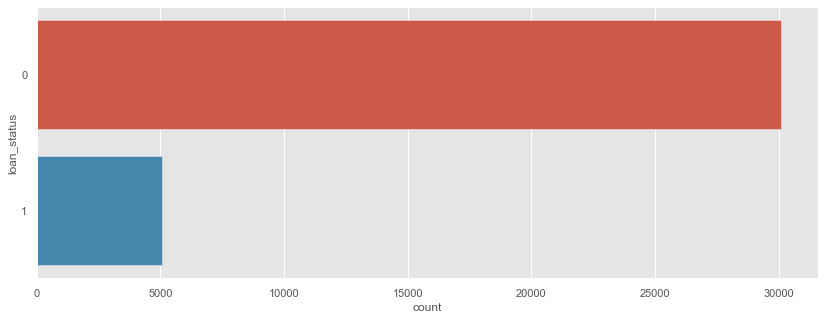

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.figure(figsize=(14,5))
sns.countplot(y="loan_status", data=lds)
plt.show()

### Univariate Analysis



In [164]:
# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=lds, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=lds)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

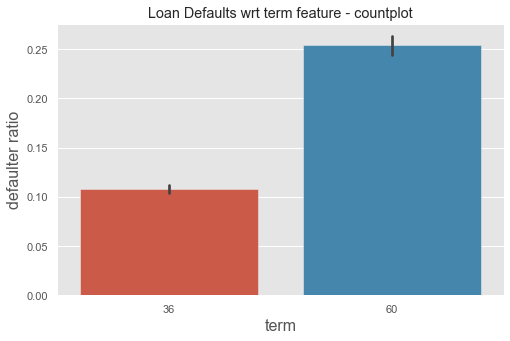

In [165]:
# check for defaulters wrt term in the data using countplot
plotUnivariateBar("term", figsize=(8,5))

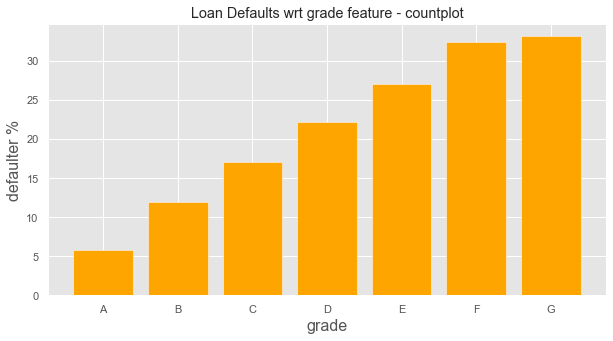

In [166]:
# check for defaulters wrt grade in the data using countplot
plotUnivariateRatioBar("grade")

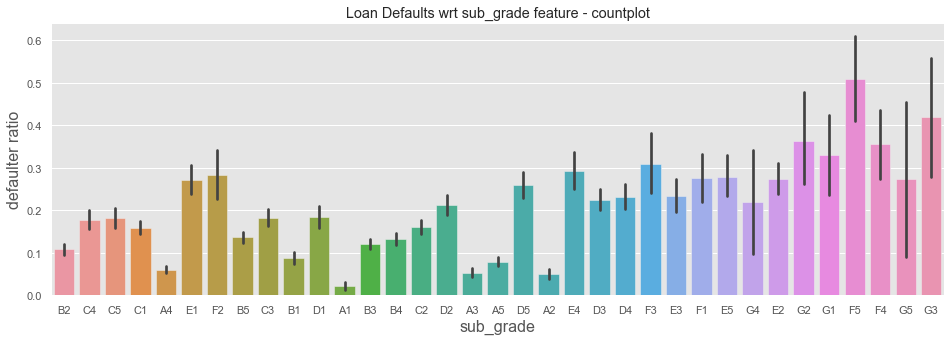

In [167]:
# check for defaulters wrt sub_grade in the data using countplot
plotUnivariateBar("sub_grade", figsize=(16,5))

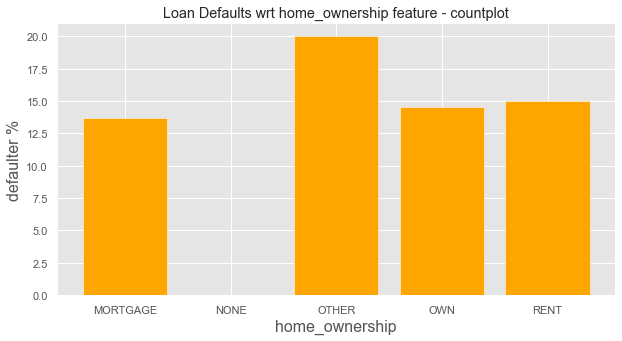

In [168]:
# check for defaulters wrt home_ownership in the data 
plotUnivariateRatioBar("home_ownership")

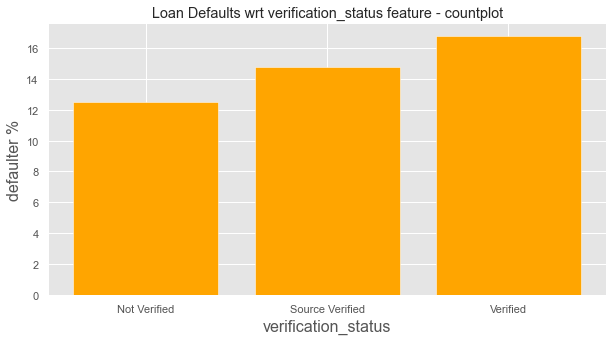

In [169]:
# check for defaulters wrt verification_status in the data
plotUnivariateRatioBar("verification_status")

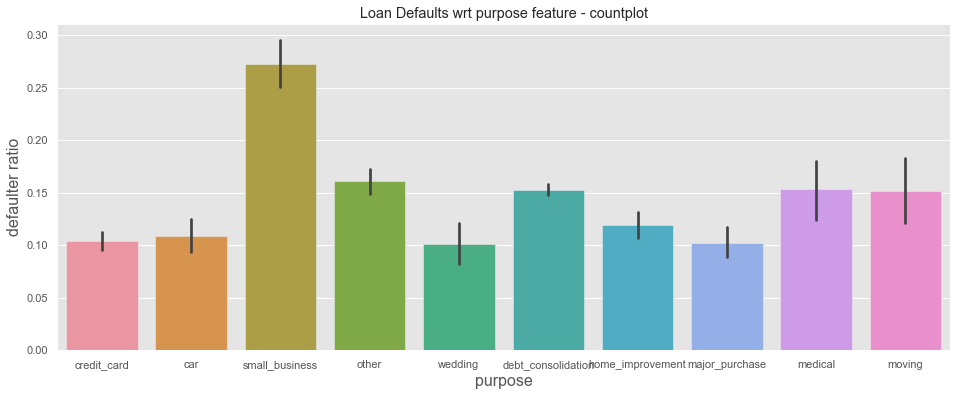

In [170]:
# check for defaulters wrt purpose in the data using countplot
plotUnivariateBar("purpose", figsize=(16,6))

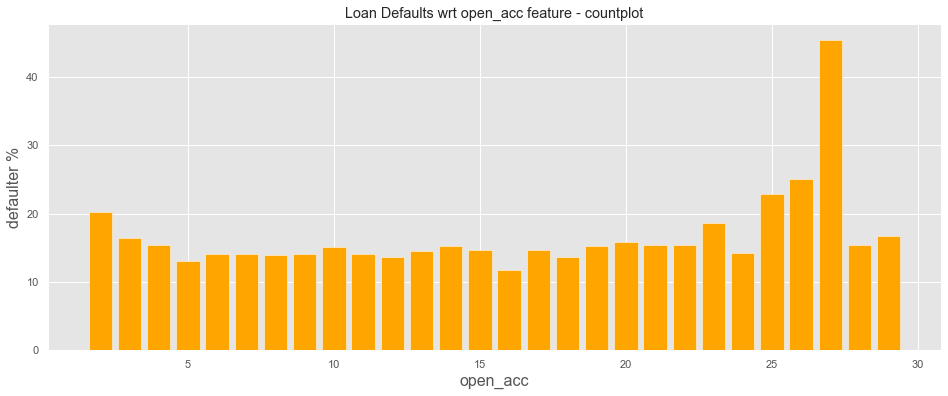

In [171]:
# check for defaulters wrt open_acc in the data using countplot
plotUnivariateRatioBar("open_acc", figsize=(16,6))

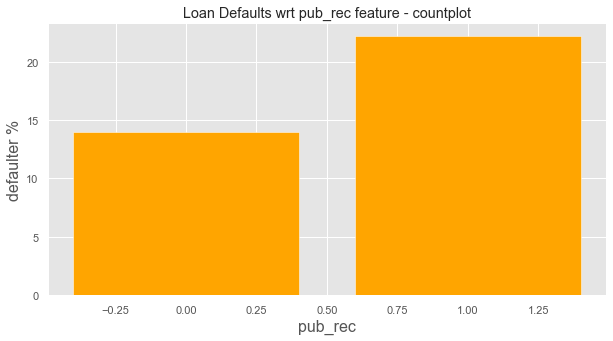

In [172]:
# check for defaulters wrt pub_rec in the data using countplot
plotUnivariateRatioBar("pub_rec")

#### Working on Continuous column variables

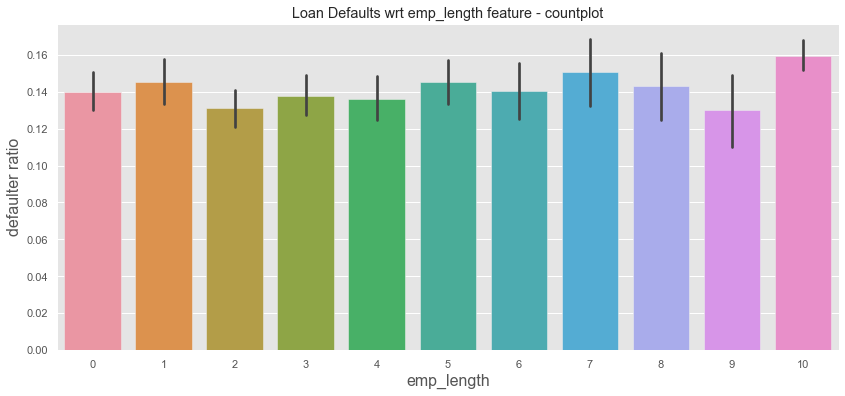

In [173]:
# check for defaulters wrt emp_length in the data using countplot
plotUnivariateBar("emp_length", figsize=(14,6))

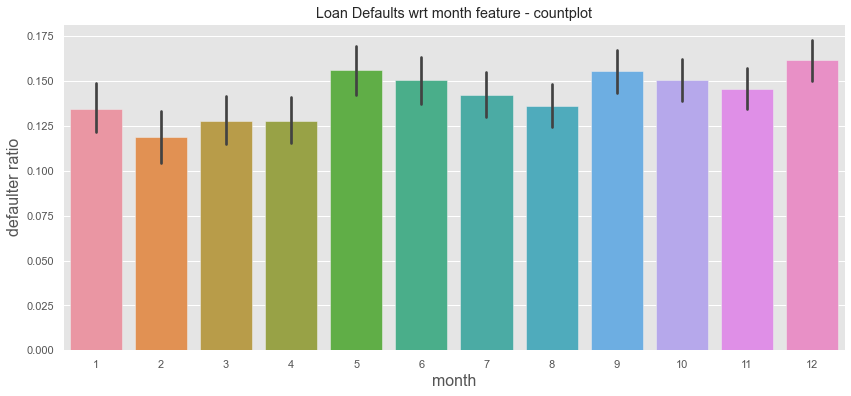

In [174]:
# check for defaulters wrt month in the data using countplot
plotUnivariateBar("month", figsize=(14,6))

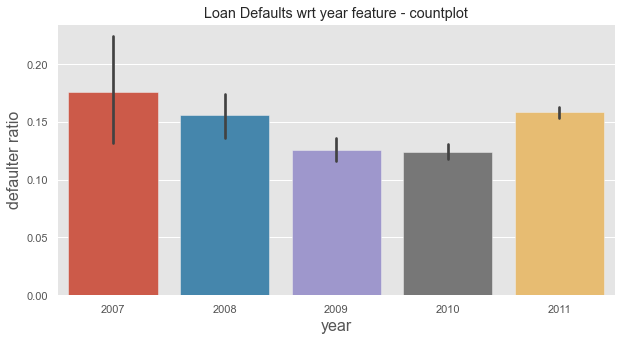

In [175]:
# check for defaulters wrt year in the data using countplot
plotUnivariateBar("year")

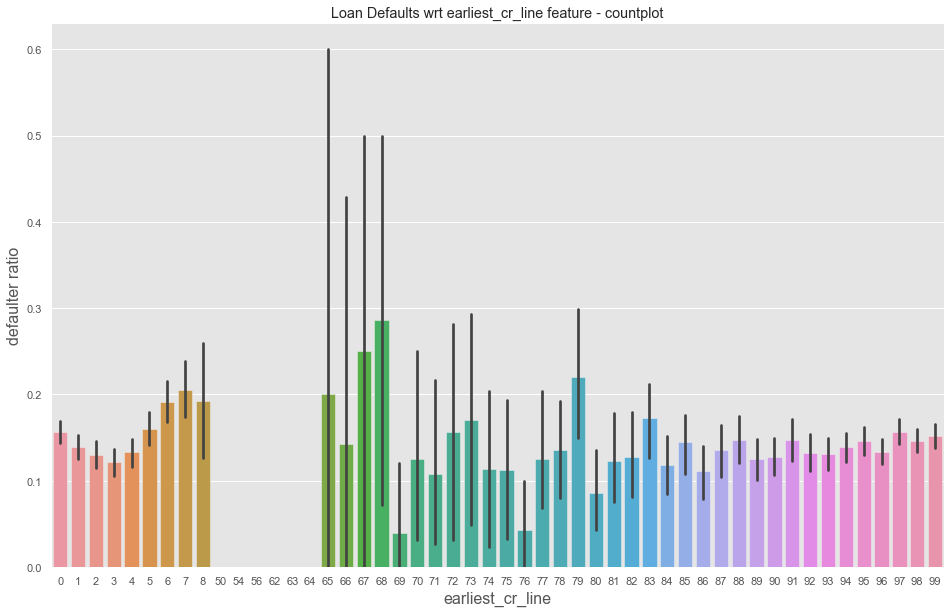

In [176]:
# check for defaulters wrt earliest_cr_line in the data
plotUnivariateBar("earliest_cr_line", figsize=(16,10))

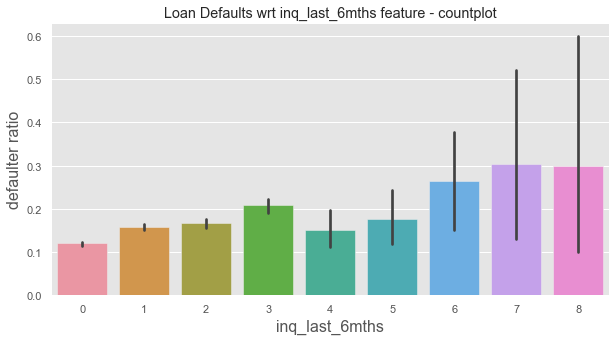

In [177]:
# check for defaulters wrt inq_last_6mths in the data
plotUnivariateBar("inq_last_6mths")

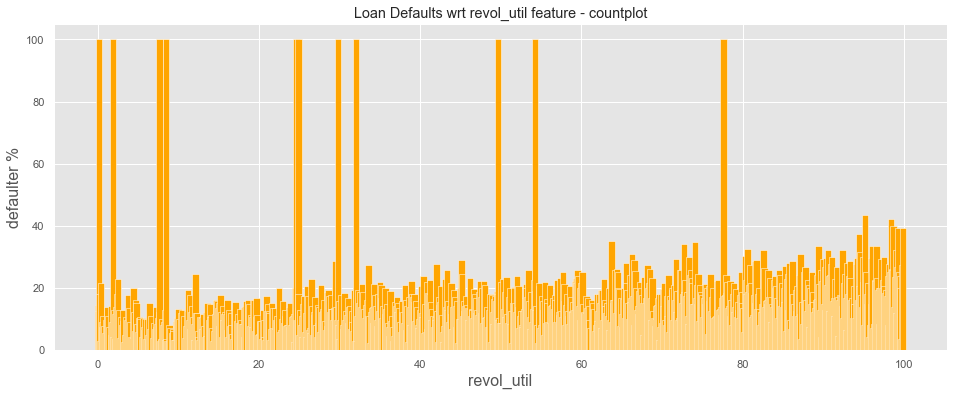

In [178]:
# check for defaulters wrt revol_util in the data using countplot
plotUnivariateRatioBar("revol_util", figsize=(16,6))

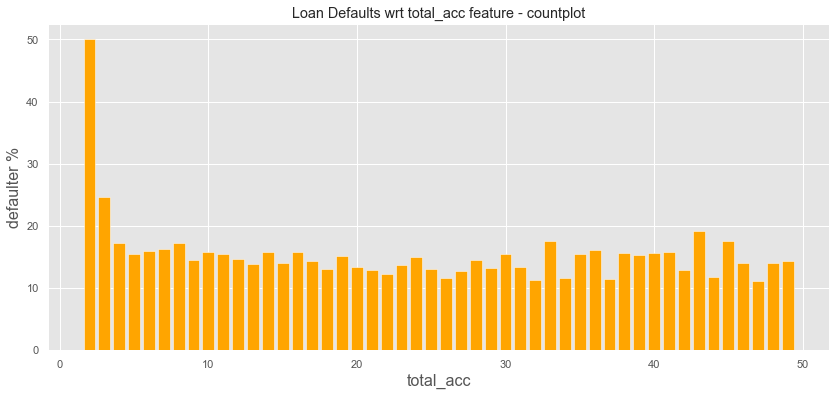

In [179]:
# check for defaulters wrt total_acc in the data using countplot
plotUnivariateRatioBar("total_acc", figsize=(14,6))

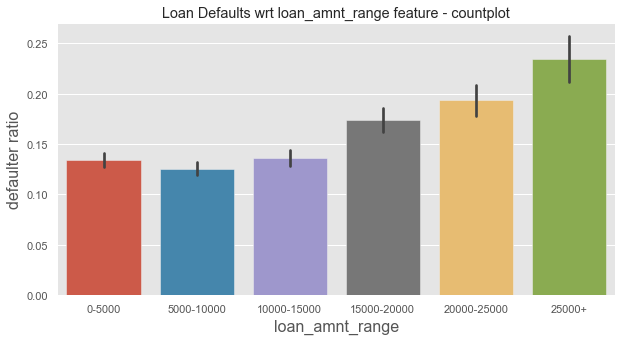

In [180]:
# check for defaulters wrt loan_amnt_range in the data using countplot
plotUnivariateBar("loan_amnt_range")

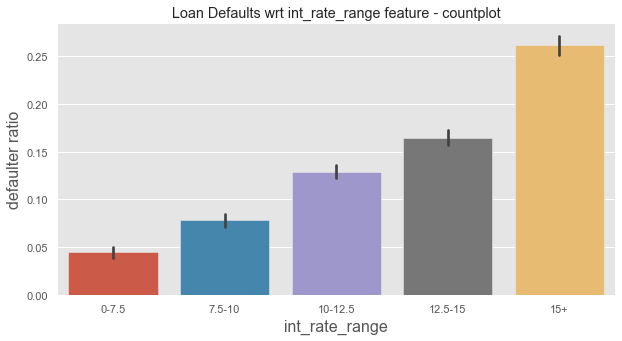

In [181]:
# check for defaulters wrt int_rate_range in the data
plotUnivariateBar("int_rate_range")

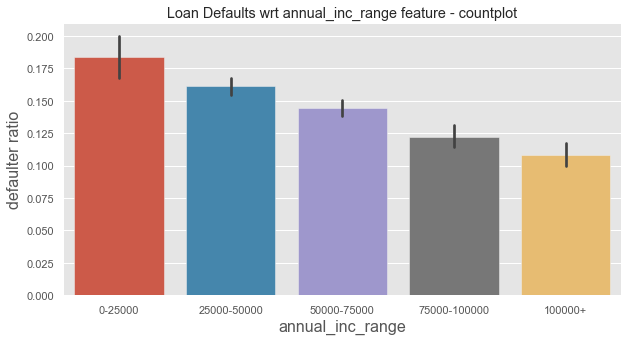

In [182]:
# check for defaulters wrt annual_inc_range in the data
plotUnivariateBar("annual_inc_range")

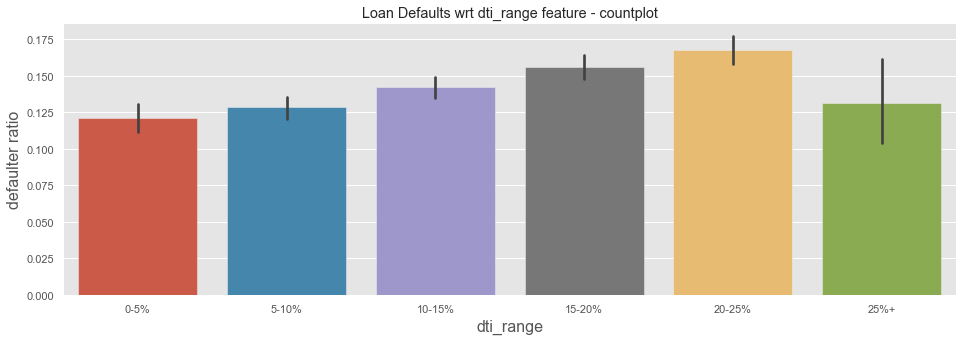

In [183]:
# check for defaulters wrt dti_range in the data using countplot
plotUnivariateBar("dti_range", figsize=(16,5))

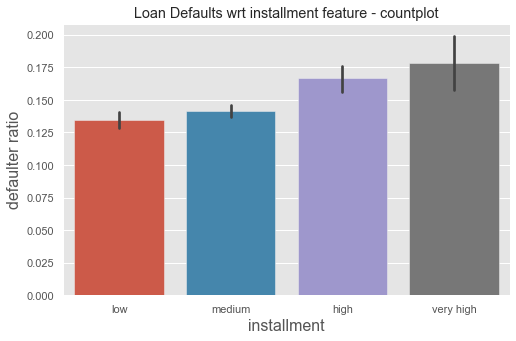

In [184]:
# check for defaulters wrt installment range in the data
plotUnivariateBar("installment", figsize=(8,5))

### Bivariate Analysis

In [195]:
# function to plot scatter plot for two features
def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=lds)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', hue=hue, data=lds)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

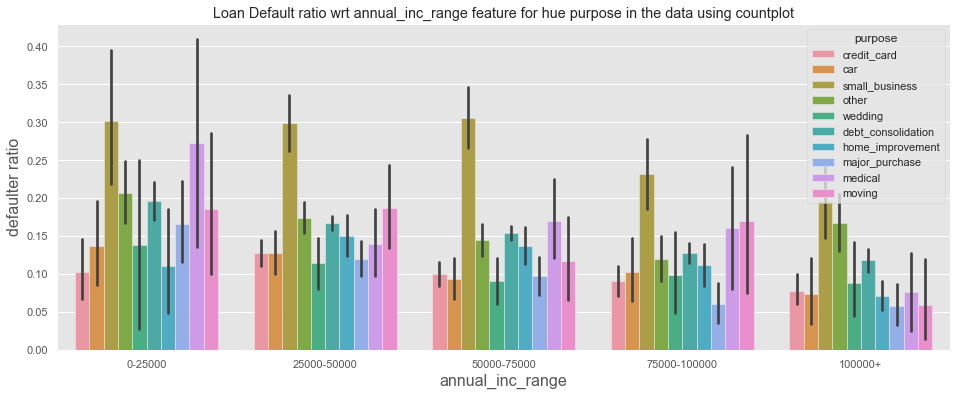

In [196]:
# check for defaulters wrt annual_inc and purpose in the data using countplot
plotBivariateBar("annual_inc_range", "purpose")

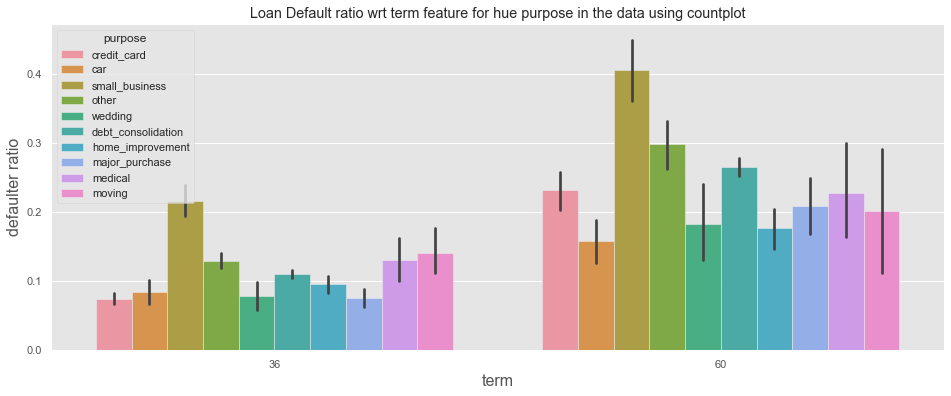

In [197]:
# check for defaulters wrt term and purpose in the data 
plotBivariateBar("term", "purpose")

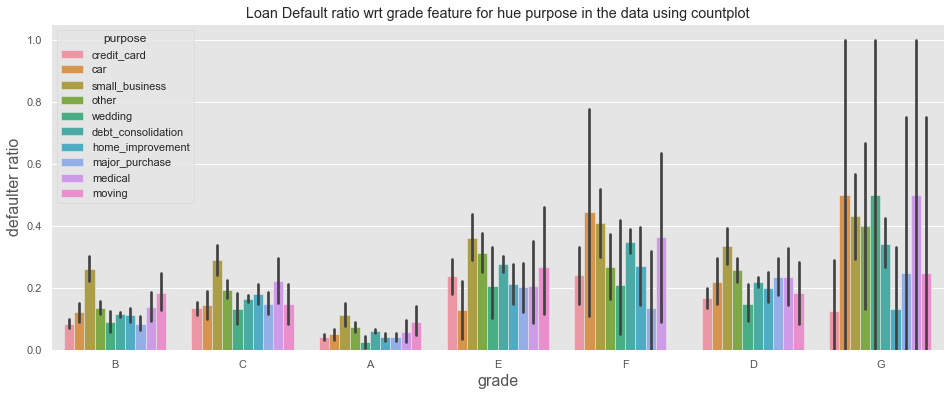

In [198]:
# check for defaulters wrt grade and purpose in the data 
plotBivariateBar("grade", "purpose")

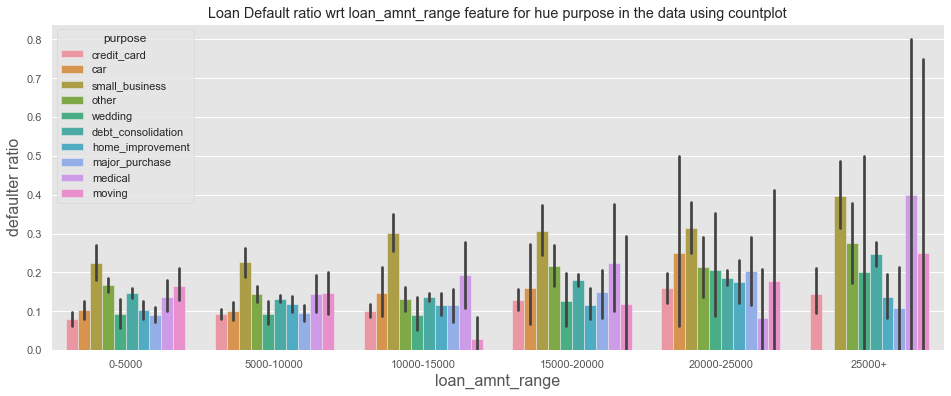

In [199]:
# check for defaulters wrt loan_amnt_range and purpose in the data
plotBivariateBar("loan_amnt_range", "purpose")

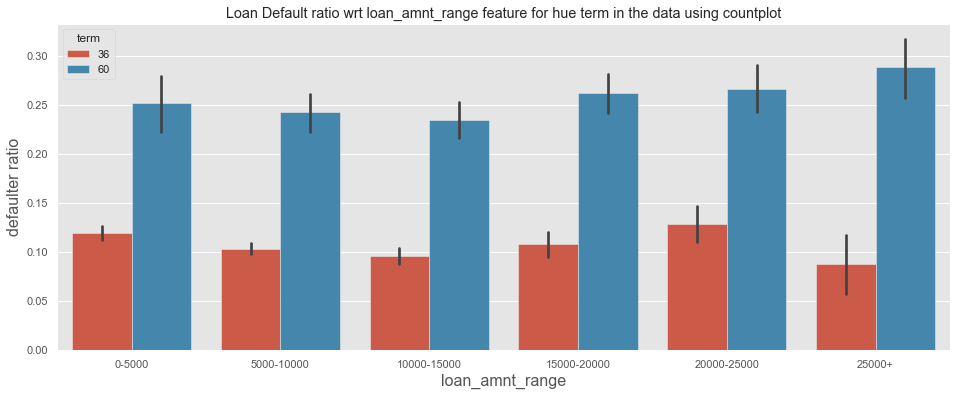

In [200]:
# check for defaulters wrt loan_amnt_range and term in the data
plotBivariateBar("loan_amnt_range", "term")

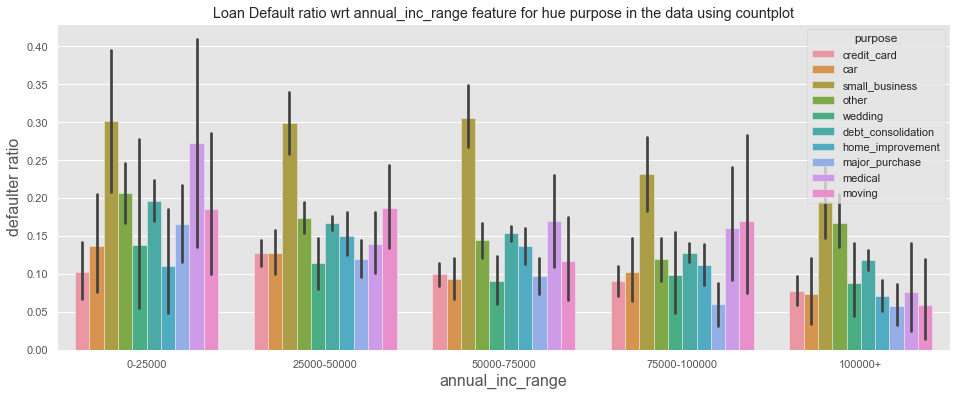

In [201]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("annual_inc_range", "purpose")

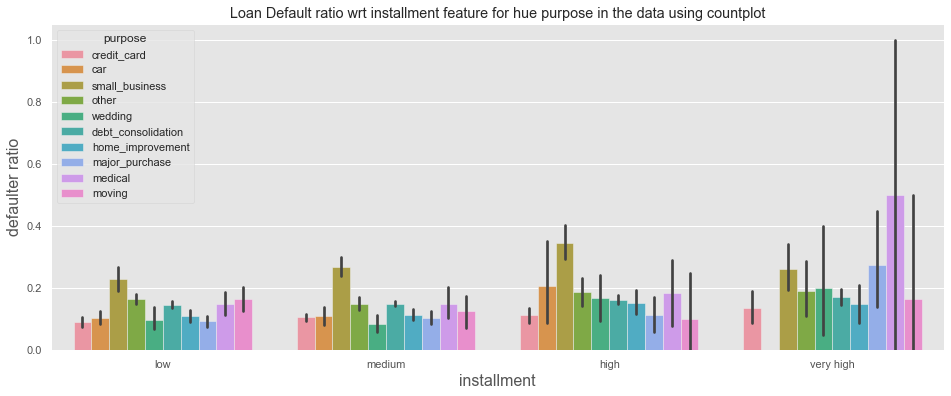

In [202]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("installment", "purpose")

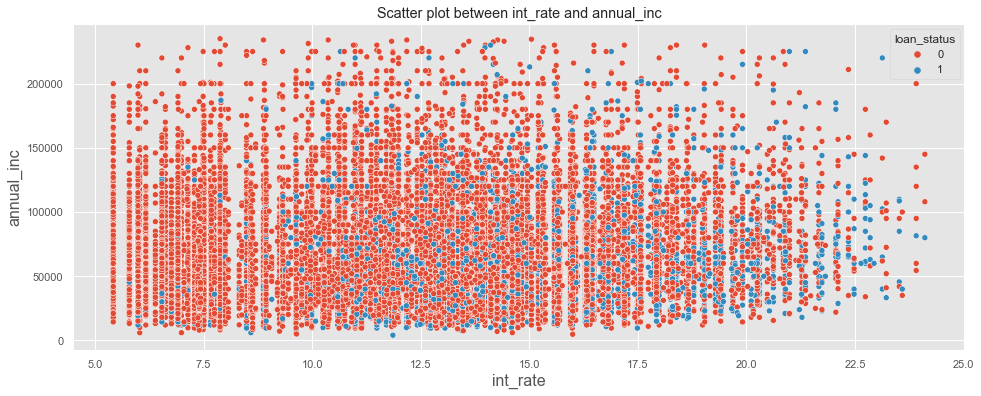

In [203]:
# check for defaulters wrt loan_amnt_range in the data
plotScatter("int_rate", "annual_inc")

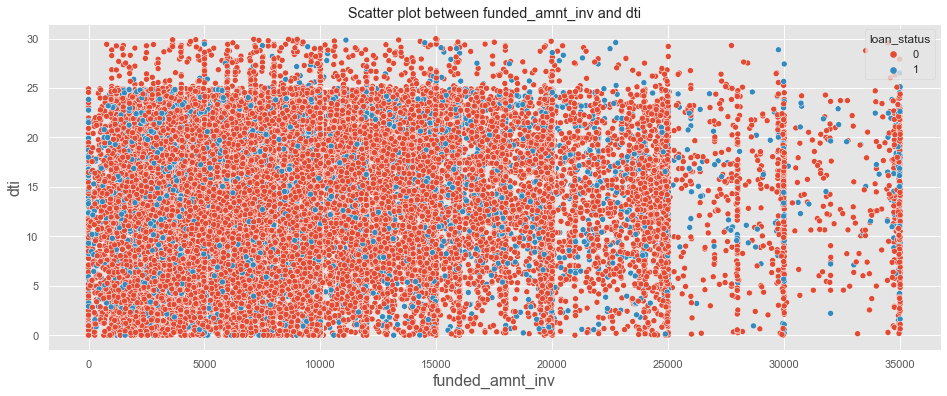

In [204]:
# plot scatter for funded_amnt_inv with dti
plotScatter("funded_amnt_inv", "dti")

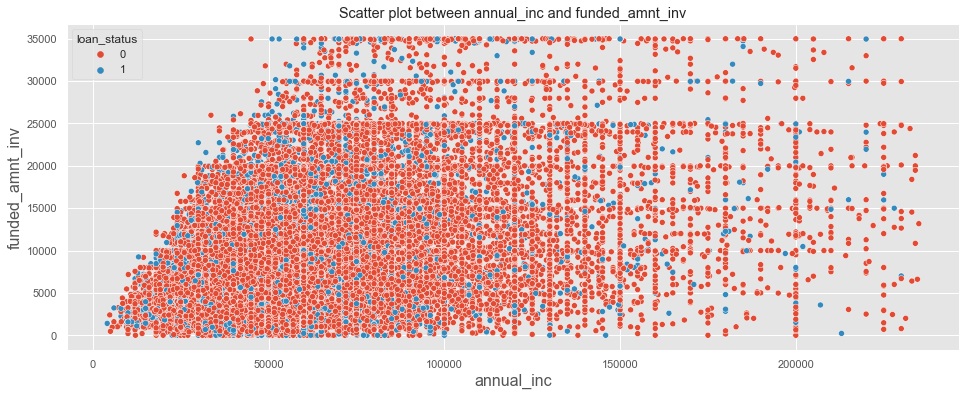

In [205]:
# plot scatter for funded_amnt_inv with annual_inc
plotScatter("annual_inc", "funded_amnt_inv")

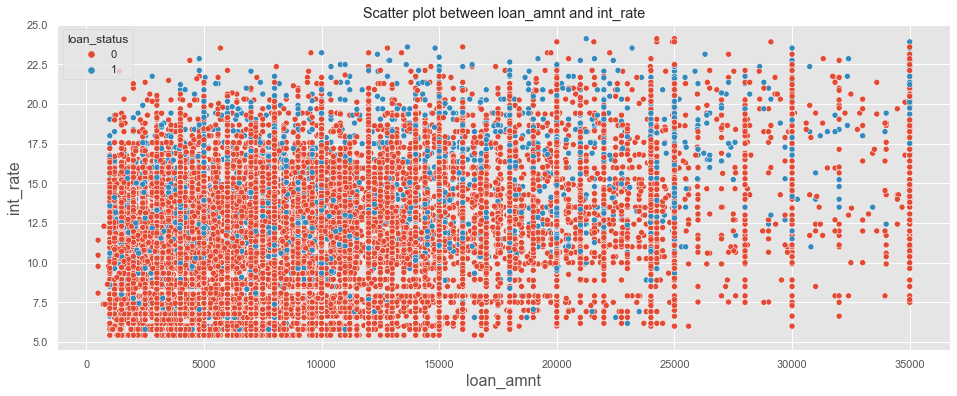

In [206]:
# plot scatter for loan_amnt with int_rate
plotScatter("loan_amnt", "int_rate")

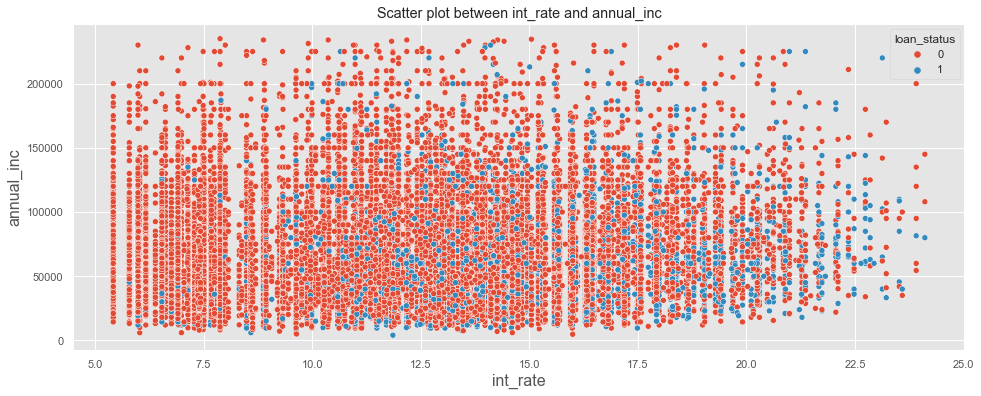

In [207]:
# plot scatter for int_rate with annual_inc
plotScatter("int_rate", "annual_inc")

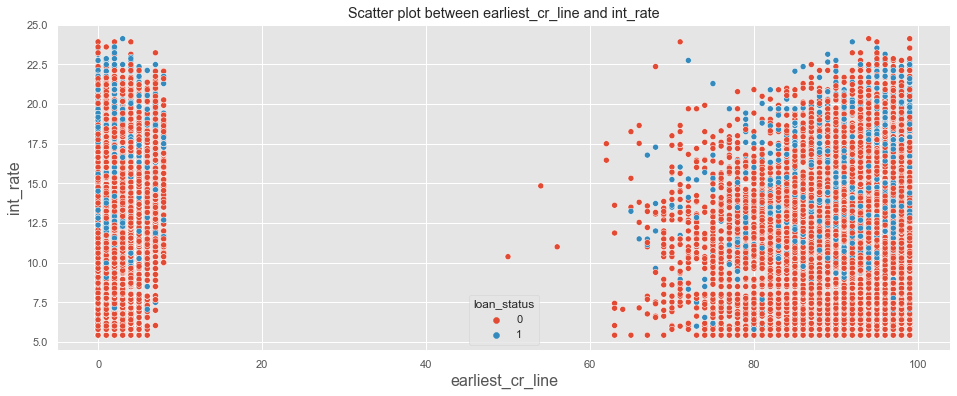

In [208]:
# plot scatter for earliest_cr_line with int_rate
plotScatter("earliest_cr_line", "int_rate")

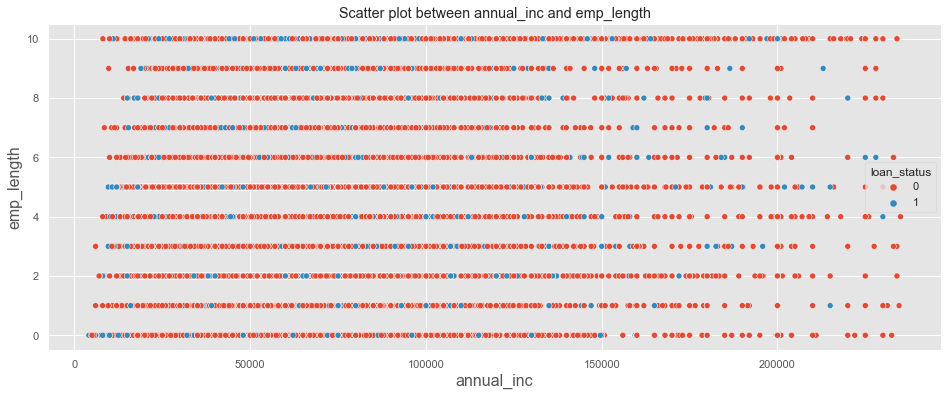

In [209]:
# plot scatter for annual_inc with emp_length
plotScatter("annual_inc", "emp_length")

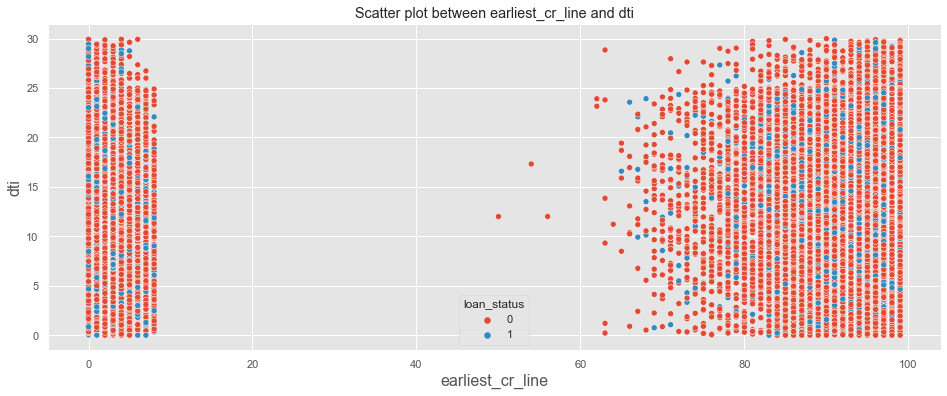

In [210]:
# plot scatter for earliest_cr_line with dti
plotScatter("earliest_cr_line", "dti")

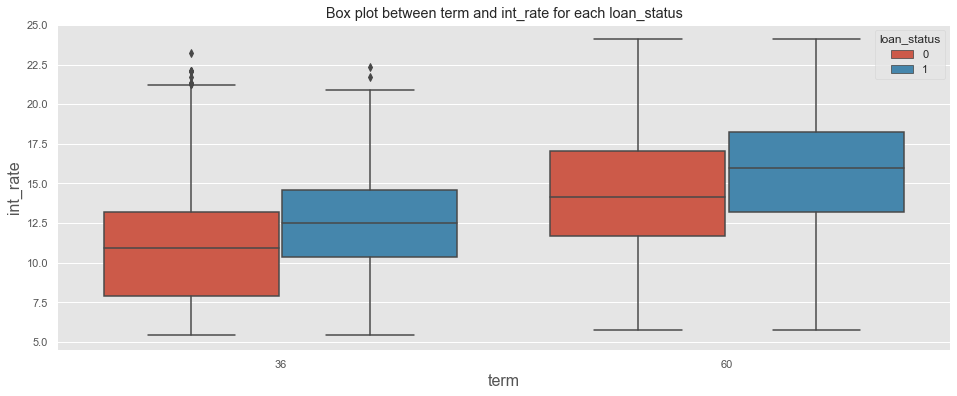

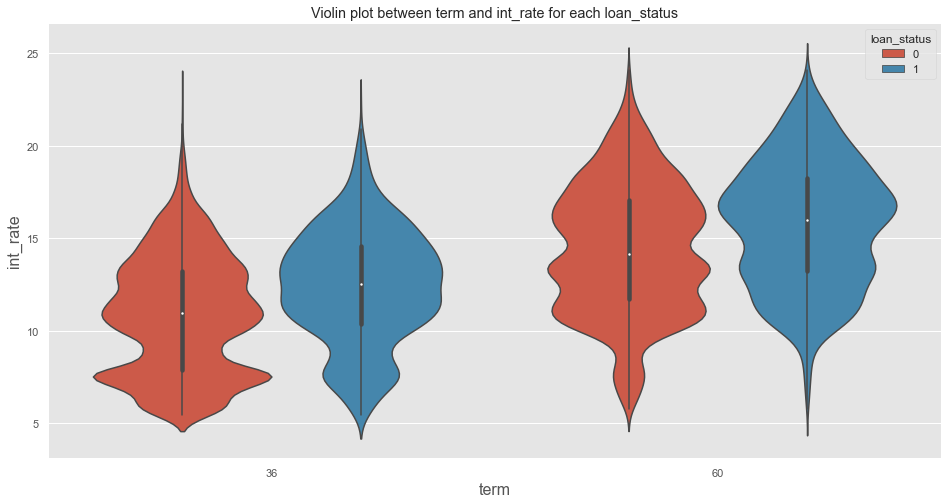

In [213]:
# function to plot boxplot for comparing two features
def plotBox(x, y, hue="loan_status"):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=x, y=y, data=lds, hue=hue, order=sorted(lds[x].unique()))
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    plt.figure(figsize=(16,8))
    sns.violinplot(x=x, y=y, data=lds, hue=hue, order=sorted(lds[x].unique()))
    plt.title("Violin plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
# plot box for term vs int_rate for each loan_status
plotBox("term", "int_rate")

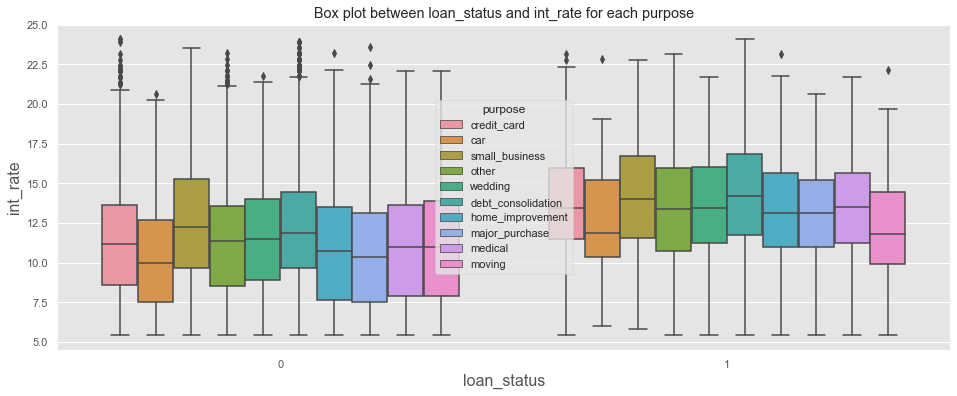

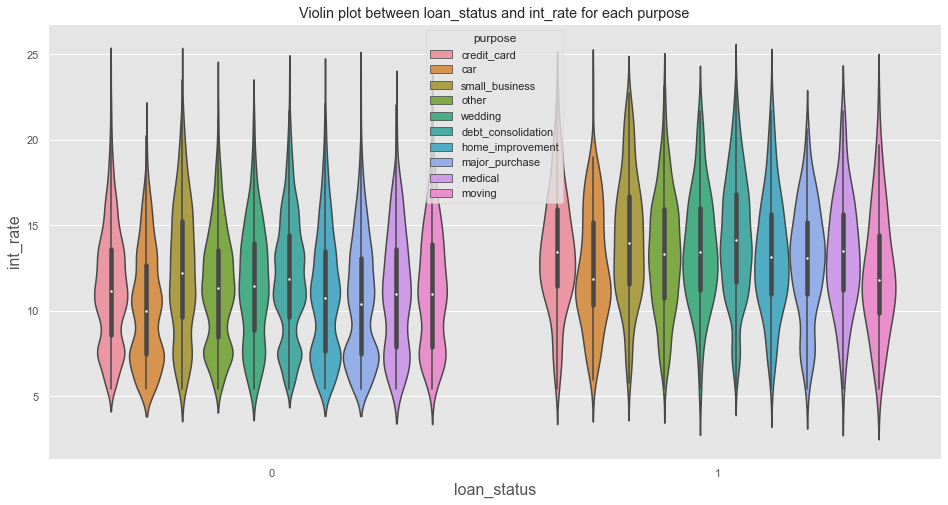

In [214]:
# plot box for loan_status vs int_rate for each purpose
plotBox("loan_status", "int_rate", hue="purpose")

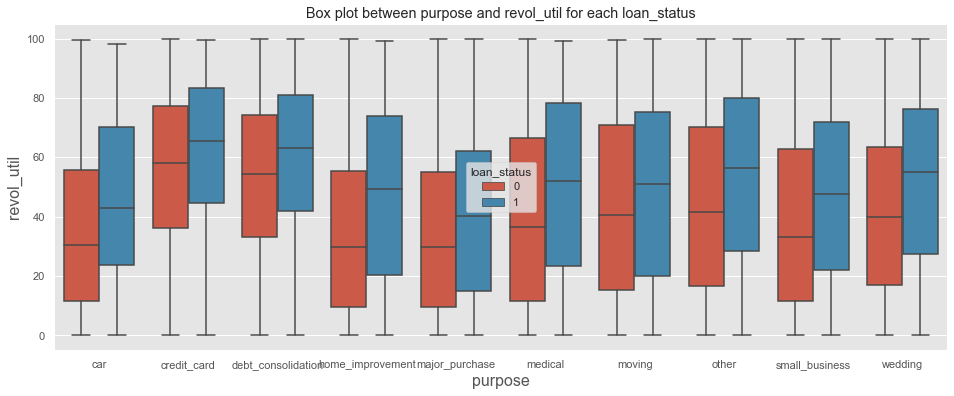

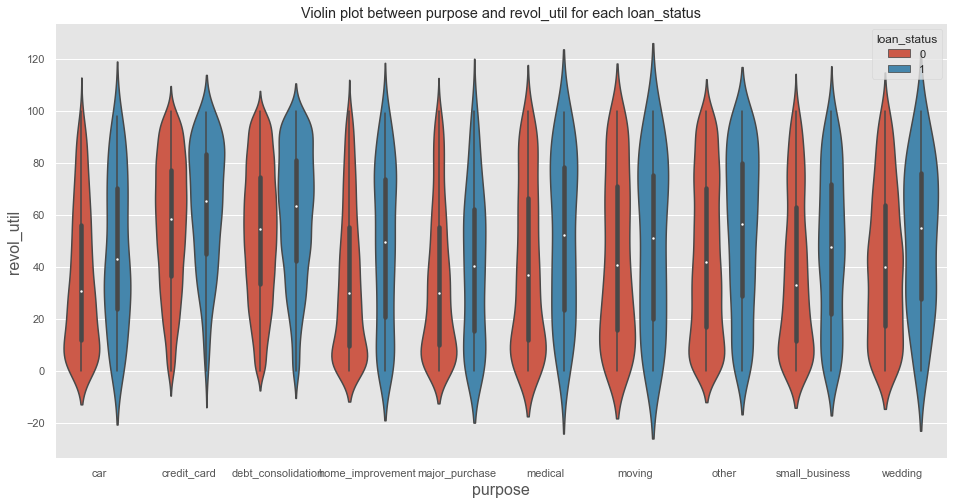

In [215]:
# plot box for purpose vs revo_util for each status
plotBox("purpose", "revol_util")

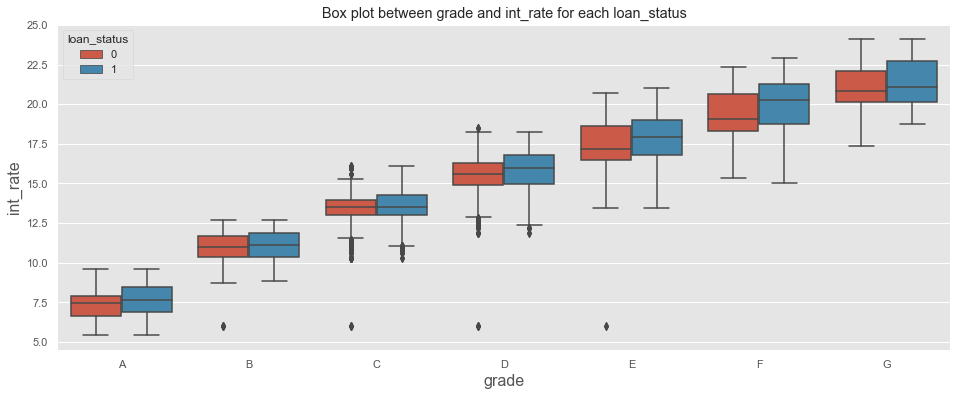

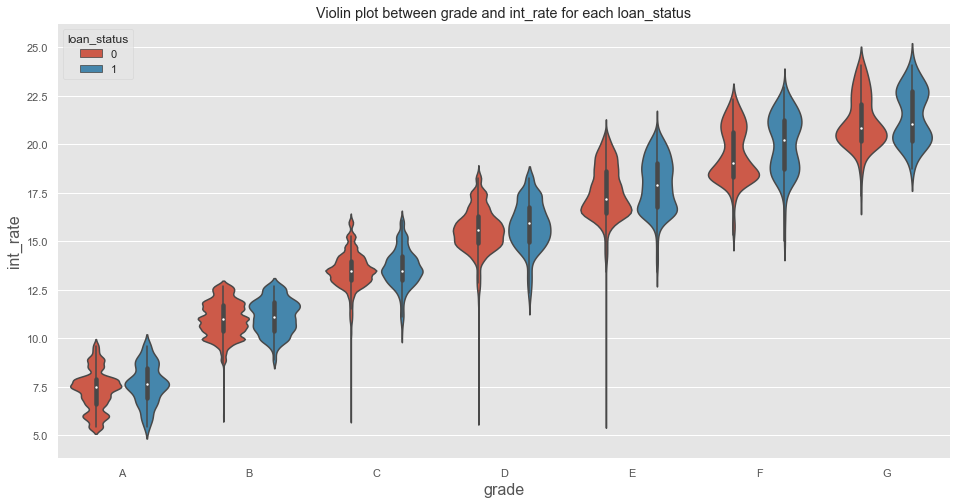

In [216]:
# plot box for grade vs int_rate for each loan_status
plotBox("grade", "int_rate", "loan_status")

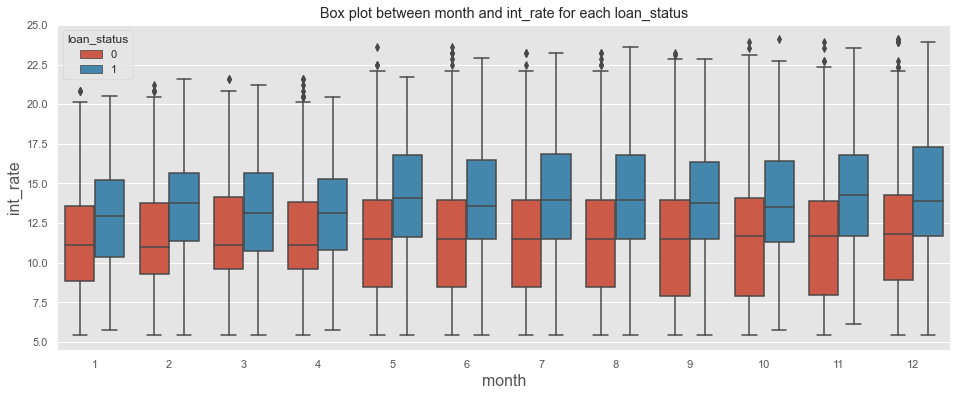

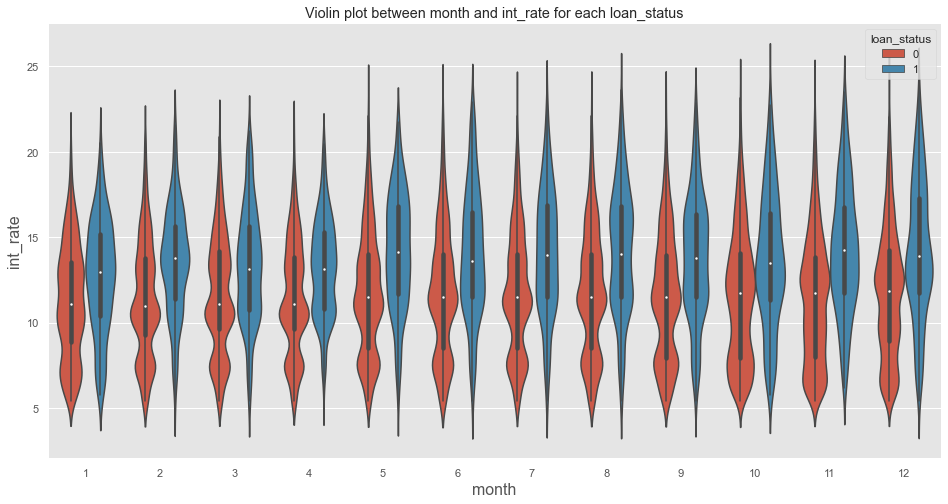

In [217]:
# plot box for issue_d vs int_rate for each loan_status
plotBox("month", "int_rate", "loan_status")

Therefore, following are the important feature we deduced from above Bivariate analysis:
term, grade, purpose, pub_rec, revol_util, funded_amnt_inv, int_rate, annual_inc, installment

### Multivariate Analysis (Correlation)

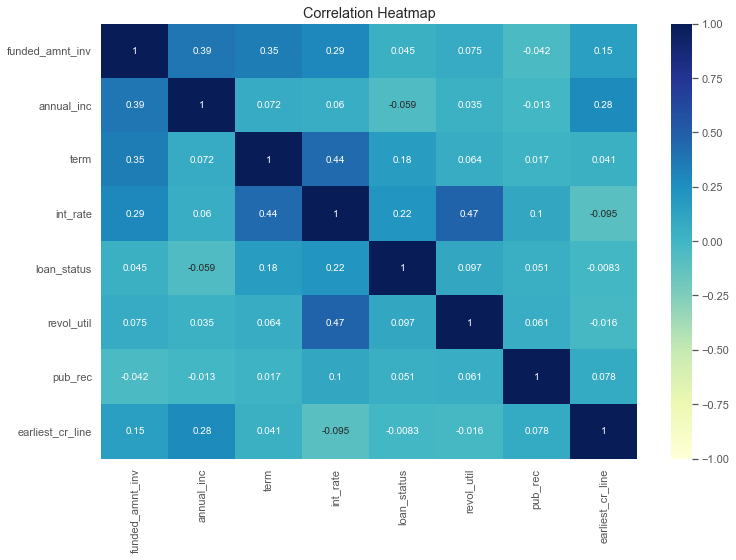

In [219]:
# plot heat map to see correlation between features
continuous_f = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status", "revol_util", "pub_rec", "earliest_cr_line"]
loan_corr = lds[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

#### Hence, important related feature from above Multivariate analysis are:
term, grade, purpose, revol_util, int_rate, installment, annual_inc, funded_amnt_inv

### Final Findings
After analysing all the related features available in the dataset, we have come to an end, deducing the main driving features for the Lending Club Loan Default analysis:
#### The best driving features for the Loan default analysis are: term, grade, purpose, revol_util, int_rate, installment, annual_inc, funded_amnt_inv

#### Findings through EXCEL and Python (which Mr.Anand sir taught):

##### Driver Variables (i.e. variables which are strong indicators of default) using Python

###### Dti

import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
dti=pd.DataFrame(data, columns= ['dti'])
dti['dti']
print(dti.mean())
print(dti.describe())

dti
count  39717.000000
mean      13.315130
std        6.678594
min        0.000000
25%        8.170000
50%       13.400000
75%       18.600000
max       29.990000

##### Removing Outliers from the dti (Debit to Income) Column to improve the accuracy
Q1 = dti['dti'].quantile(0.95)
Q3 = dti['dti'].quantile(1)
IQR = Q3 - Q1
df = dti[~((dti['dti'] < (Q3 - Q1)) |(dti['dti'] > (Q3 + 1.5 * IQR)))]

dti    15.344617
Mean value is improved

##### Quantitative Variable Univariate Analysis through summary metrics with EXCEL:
•	Dti - Debit to Income ratio is useful in univariate analysis

BOX plot is useful in spread of the data
 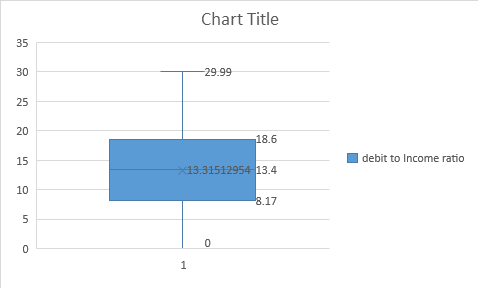

Above median value 13.4 dti value may be DEFAULTERS

•	loan_status Vs annual_inc through EXCEL


loan_status	  Average of annual_inc

Charged Off	  62427.29803
Current	      75430.66511
Fully Paid	  69862.50333
Grand Total	  68968.92638

If the annual income is less for the borrower then he is likely to become a DEFAULTER

loan_status	  Average of total_pymnt

Charged Off	  6838.030941
Current	      21852.87556
Fully Paid	  12725.78196
Grand Total	  12153.59654

If the total_pymnt is less for the borrower then he is likely to become a DEFAULTER

##### Bivariate Analysis on Continuous Variables

import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
curr2=pd.DataFrame(data, columns= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'])
curr2
curr2.corr()

import matplotlib.pyplot as plt
plt.matshow(curr2.corr())
plt.show()



INFERENCE
'loan_amnt' is correlated to  'funded_amnt', 
'loan_amnt' and to  'funded_amnt‘ is correlated ''installment', 
'total_pymnt', 
'funded_amnt_inv' is correlated to 'total_pymnt_inv',
total_pymnt and total_pymnt_inv' is correlated to 'total_rec_prncp


# this my rough work....

In [220]:
import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
share=pd.DataFrame(data, columns= ['dti'])
share['dti']


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0       27.65
1        1.00
2        8.72
3       20.00
4       17.94
         ... 
39712   11.33
39713    6.40
39714    2.30
39715    3.72
39716   14.29
Name: dti, Length: 39717, dtype: float64

In [221]:
import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
dti=pd.DataFrame(data, columns= ['dti'])
dti['dti']
print(dti.mean())
print(dti.describe())

dti   13.32
dtype: float64
           dti
count 39717.00
mean     13.32
std       6.68
min       0.00
25%       8.17
50%      13.40
75%      18.60
max      29.99


In [222]:
Q1 = dti['dti'].quantile(0.95)
Q3 = dti['dti'].quantile(1)
IQR = Q3 - Q1

df = dti[~((dti['dti'] < (Q3 - Q1)) |(dti['dti'] > (Q3 + 1.5 * IQR)))]

In [223]:
print(df)
df.mean()

        dti
0     27.65
2      8.72
3     20.00
4     17.94
5     11.20
...     ...
39708  8.03
39711 15.55
39712 11.33
39713  6.40
39716 14.29

[33012 rows x 1 columns]


dti   15.34
dtype: float64

In [224]:
import numpy

arr = dti['dti']

elements = numpy.array(arr)

mean = numpy.mean(elements, axis=0)
sd = numpy.std(elements, axis=0)

final_list = [x for x in arr if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
mn=numpy.mean(final_list, axis=0)
print(mn)
print(final_list)

13.16437000864744
[1.0, 8.72, 20.0, 17.94, 11.2, 23.51, 5.35, 5.55, 18.08, 16.12, 10.78, 10.08, 12.56, 7.06, 20.31, 18.6, 10.52, 18.44, 9.86, 26.53, 13.22, 11.18, 16.01, 2.4, 15.22, 13.97, 5.63, 12.19, 20.34, 14.03, 22.83, 11.93, 6.35, 11.8, 5.5, 8.48, 10.62, 16.04, 6.63, 16.7, 17.39, 20.01, 5.34, 10.0, 16.33, 11.47, 12.74, 10.85, 9.12, 15.71, 7.38, 20.88, 8.11, 21.58, 20.52, 18.58, 19.14, 24.0, 13.72, 19.47, 16.46, 21.64, 21.73, 5.39, 13.16, 22.71, 12.48, 11.88, 18.79, 20.22, 18.11, 20.57, 14.85, 16.56, 21.82, 24.82, 9.65, 6.81, 7.51, 15.39, 9.86, 4.44, 11.35, 19.96, 6.34, 5.4, 16.85, 21.33, 23.94, 5.38, 2.8, 20.73, 21.01, 20.58, 10.04, 21.31, 2.31, 13.66, 20.64, 15.56, 13.17, 6.12, 8.18, 23.18, 14.8, 11.58, 15.38, 19.72, 9.69, 20.5, 12.15, 10.05, 24.14, 9.7, 7.0, 13.32, 25.26, 16.44, 14.15, 22.8, 14.81, 24.09, 20.7, 10.33, 23.21, 22.71, 9.75, 15.8, 9.17, 18.89, 18.3, 17.71, 4.8, 2.97, 10.82, 18.2, 19.69, 16.91, 7.36, 23.53, 12.38, 7.83, 15.8, 16.74, 12.86, 22.51, 17.68, 22.08, 18.18,

In [225]:
import pandas as pd
cenus=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
cenus.describe()

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  \
count   39717.00   39717.00   39717.00     39717.00         39717.00     39717.00    39717.00 39717.00     39717.00        39717.00                14035.00                 2786.00  39717.00 39717.00   39717.00   39717.00   39717.00       39717.00     39717.00         39717.00         39717.00       39717.00            39717.00    39717.00                 39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45       324.56    68968.93    13.32         0.15            0.87                   35.90                   69.70      9.29     0.06   13382.53      22.09      51.23          50.99     12153.60         11567.15          9793.35        2263.66                1.36       95.22                    12.41          2678.83   
std    210694.13  265678.31    7456.67      7187.24          7128.45       208.87    63793.77     6.68         0.49            1.07                   22.02                   43.82      4.40     0.24   15885.02      11.40     375.17         373.82      9042.04          8942.67          7065.52        2608.11                7.29      688.74                   148.67          4447.14   
min     54734.00   70699.00     500.00       500.00             0.00        15.69     4000.00     0.00         0.00            0.00                    0.00                    0.00      2.00     0.00       0.00       2.00       0.00           0.00         0.00             0.00             0.00           0.00                0.00        0.00                     0.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00       167.02    40404.00     8.17         0.00            0.00                   18.00                   22.00      6.00     0.00    3703.00      13.00       0.00           0.00      5576.93          5112.31          4600.00         662.18                0.00        0.00                     0.00           218.68   
50%    665665.00  850812.00   10000.00      9600.00          8975.00       280.22    59000.00    13.40         0.00            1.00                   34.00                   90.00      9.00     0.00    8850.00      20.00       0.00           0.00      9899.64          9287.15          8000.00        1348.91                0.00        0.00                     0.00           546.14   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00       430.78    82300.00    18.60         0.00            1.00                   52.00                  104.00     12.00     0.00   17058.00      29.00       0.00           0.00     16534.43         15798.81         13653.26        2833.40                0.00        0.00                     0.00          3293.16   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00      1305.19  6000000.00    29.99        11.00            8.00                  120.00                  129.00     44.00     4.00  149588.00      90.00    6311.47        6307.37     58563.68         58563.68         35000.02       23563.68              180.20    29623.35                  7002.19         36115.20   

       collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  acc_open_past_24mths  \
count                    39661.00                         0.00     39717.00              0.00       0.00                       0.00        39717

In [226]:
import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
curr=pd.DataFrame(data, columns= ['loan_amnt','annual_inc','total_rec_prncp'])
curr


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


loan_amnt  annual_inc  total_rec_prncp
0           5000    24000.00          5000.00
1           2500    30000.00           456.46
2           2400    12252.00          2400.00
3          10000    49200.00         10000.00
4           3000    80000.00          2475.94
...          ...         ...              ...
39712       2500   110000.00          2500.00
39713       8500    18000.00          8500.00
39714       5000   100000.00          5000.00
39715       5000   200000.00          5000.00
39716       7500    22000.00          7500.00

[39717 rows x 3 columns]

In [227]:
curr.corr()

loan_amnt  annual_inc  total_rec_prncp
loan_amnt             1.00        0.27             0.85
annual_inc            0.27        1.00             0.26
total_rec_prncp       0.85        0.26             1.00

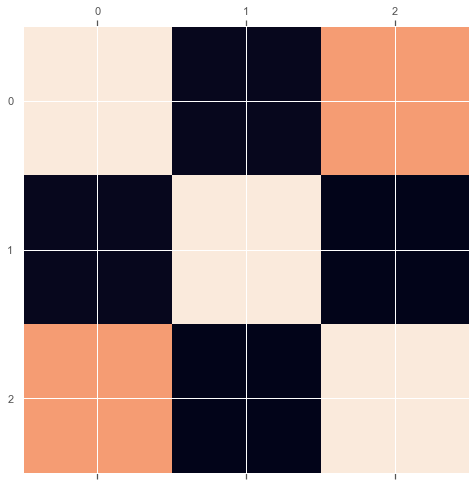

In [228]:
import matplotlib.pyplot as plt
plt.matshow(curr.corr())
plt.show()

In [229]:
import pandas as pd
cust_rating = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/GvOkzy5MLdy9zJ8vXMArwpRvN/rating_final.csv')
cust_rating=pd.DataFrame(cust_rating, columns= ['userID','placeID','rating','food_rating','service_rating','avg_rating'])
cust_rating['avg_rating'] = round(cust_rating[['rating','food_rating','service_rating']].mean(axis=1))

print(cust_rating.head(10))

  userID  placeID  rating  food_rating  service_rating  avg_rating
0  U1077   135085       2            2               2        2.00
1  U1077   135038       2            2               1        2.00
2  U1077   132825       2            2               2        2.00
3  U1077   135060       1            2               2        2.00
4  U1068   135104       1            1               2        1.00
5  U1068   132740       0            0               0        0.00
6  U1068   132663       1            1               1        1.00
7  U1068   132732       0            0               0        0.00
8  U1068   132630       1            1               1        1.00
9  U1067   132584       2            2               2        2.00


In [230]:
import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
curr1=pd.DataFrame(data, columns= ['int_rate','dti'])
curr1

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


int_rate   dti
0       10.65% 27.65
1       15.27%  1.00
2       15.96%  8.72
3       13.49% 20.00
4       12.69% 17.94
...        ...   ...
39712    8.07% 11.33
39713   10.28%  6.40
39714    8.07%  2.30
39715    7.43%  3.72
39716   13.75% 14.29

[39717 rows x 2 columns]

In [231]:
curr1.corr()

dti
dti 1.00

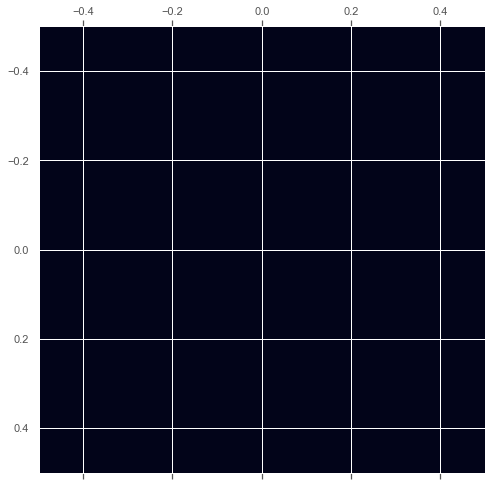

In [232]:
import matplotlib.pyplot as plt
plt.matshow(curr1.corr())
plt.show()

In [233]:
import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
curr2=pd.DataFrame(data, columns= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'])
curr2


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


loan_amnt  funded_amnt  funded_amnt_inv  installment  total_pymnt  total_pymnt_inv  total_rec_prncp
0           5000         5000          4975.00       162.87      5863.16          5833.84          5000.00
1           2500         2500          2500.00        59.83      1008.71          1008.71           456.46
2           2400         2400          2400.00        84.33      3005.67          3005.67          2400.00
3          10000        10000         10000.00       339.31     12231.89         12231.89         10000.00
4           3000         3000          3000.00        67.79      3513.33          3513.33          2475.94
...          ...          ...              ...          ...          ...              ...              ...
39712       2500         2500          1075.00        78.42      2822.97          1213.88          2500.00
39713       8500         8500           875.00       275.38      9913.49          1020.51          8500.00
39714       5000         5000          1325.00       156.84      5272.16          1397.12          5000.00
39715       5000         5000           650.00       155.38      5174.20           672.66          5000.00
39716       7500         7500           800.00       255.43      9195.26           980.83          7500.00

[39717 rows x 7 columns]

In [234]:
curr2.corr()

loan_amnt  funded_amnt  funded_amnt_inv  installment  total_pymnt  total_pymnt_inv  total_rec_prncp
loan_amnt             1.00         0.98             0.94         0.93         0.89             0.85             0.85
funded_amnt           0.98         1.00             0.96         0.96         0.90             0.87             0.87
funded_amnt_inv       0.94         0.96             1.00         0.91         0.88             0.91             0.85
installment           0.93         0.96             0.91         1.00         0.86             0.82             0.85
total_pymnt           0.89         0.90             0.88         0.86         1.00             0.97             0.97
total_pymnt_inv       0.85         0.87             0.91         0.82         0.97             1.00             0.94
total_rec_prncp       0.85         0.87             0.85         0.85         0.97             0.94             1.00

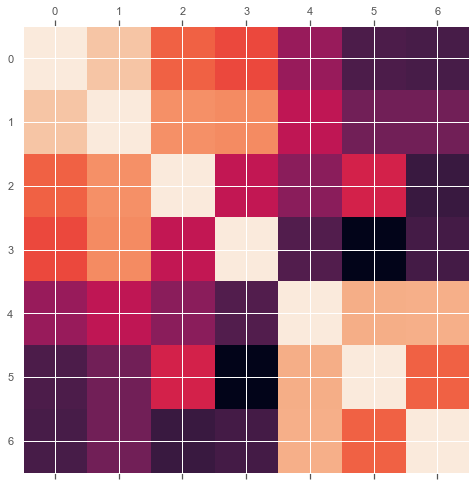

In [235]:
import matplotlib.pyplot as plt
plt.matshow(curr2.corr())
plt.show()